This notebook includes following parts: 
1. Explore the prepensity data to find the best recommendation stategy
2. Built recommendation function
3. Evaluate the effeciency and limitation of this recommendation strategy



# Step1: Import libraries

In [1]:
# to import libraries for data processing
import pandas as pd
import numpy as np

# to import libraries for data visualization
import seaborn as sns

# to import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to import libraries for data stardardization
from sklearn.preprocessing import StandardScaler

# to import libraries for similarity calculation
from sklearn.metrics.pairwise import cosine_similarity



# Step2: Read in the dataset and explore the dataset

In [2]:
# to load in dataset
arr = np.fromfile('spend_propensity.ndarray').reshape((10000, 10))
arr[:5]
# transfrom the ndarray into dataframe
df = pd.DataFrame(arr, columns=['Transportation','Health','LuxuryGoods','Service','Telecommunications','Groceries','Clothing','Food&Beverage','PublicUtilities','Others'])
df.head()

,Transportation,Health,LuxuryGoods,Service,Telecommunications,Groceries,Clothing,Food&Beverage,PublicUtilities,Others
0,1.000000,0.001096,0.359949,0.526608,0.179850,0.000117,0.431347,0.018851,0.621482,0.000025
1,0.022571,0.000113,0.057655,0.000026,0.046362,0.340015,1.000000,0.000126,0.000072,0.325961
2,0.000526,0.719754,0.000128,0.059677,0.098947,0.000043,1.000000,0.110210,0.204128,0.018084
3,0.096126,0.004975,1.000000,0.000070,0.087914,0.082544,0.000595,0.709525,0.000011,0.085146
4,0.184781,0.262162,1.000000,0.046396,0.023228,0.024363,0.000409,0.000490,0.000033,0.323932


In [3]:
# to check null value
df.isnull().sum()

Transportation        0
Health                0
LuxuryGoods           0
Service               0
Telecommunications    0
Groceries             0
Clothing              0
Food&Beverage         0
PublicUtilities       0
Others                0
dtype: int64

In [4]:
# to have a look at the description for each category
df.describe()

,Transportation,Health,LuxuryGoods,Service,Telecommunications,Groceries,Clothing,Food&Beverage,PublicUtilities,Others
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,2.620870e-01,2.613816e-01,2.647774e-01,2.701260e-01,2.619639e-01,2.621553e-01,2.602603e-01,2.620855e-01,2.682318e-01,2.622940e-01
std,3.335063e-01,3.340290e-01,3.352199e-01,3.389693e-01,3.322289e-01,3.344579e-01,3.350864e-01,3.355321e-01,3.365369e-01,3.347976e-01
min,2.031674e-08,1.953075e-08,1.572039e-07,7.414022e-09,1.291626e-07,9.613614e-08,9.695239e-08,1.887459e-07,5.606273e-08,1.150254e-08
25%,7.693882e-04,7.835841e-04,8.783395e-04,8.490017e-04,7.639348e-04,7.881602e-04,7.249801e-04,8.327404e-04,8.576036e-04,7.403759e-04
50%,1.024767e-01,9.952123e-02,1.055937e-01,1.109844e-01,1.044472e-01,1.005934e-01,9.788348e-02,9.893558e-02,1.092593e-01,1.024669e-01
75%,4.028182e-01,4.091094e-01,4.107699e-01,4.184649e-01,4.048494e-01,4.056897e-01,4.000012e-01,4.103411e-01,4.235489e-01,4.007505e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


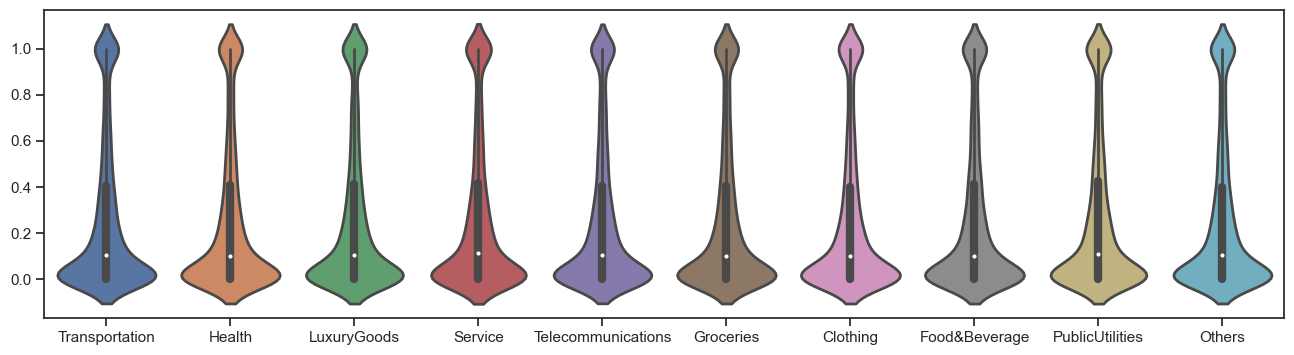

In [5]:
# to have a look at the distribution for each category using violin plot
sns.set(style="white")
# adjust the font size
sns.set(style="ticks", font_scale=1)
# adjust the figure size
f, ax = plt.subplots(figsize=(16, 4))
ax = sns.violinplot(data=df, linewidth=2)

In [6]:
# use the Pearson correlation to calculate the similarity among categories
df.corr()

,Transportation,Health,LuxuryGoods,Service,Telecommunications,Groceries,Clothing,Food&Beverage,PublicUtilities,Others
Transportation,1.000000,-0.045492,-0.054909,-0.052688,-0.059285,-0.051676,-0.062037,-0.052202,-0.049813,-0.060528
Health,-0.045492,1.000000,-0.041909,-0.062975,-0.047232,-0.054830,-0.060658,-0.061165,-0.060619,-0.065062
LuxuryGoods,-0.054909,-0.041909,1.000000,-0.071136,-0.043053,-0.061652,-0.057347,-0.046872,-0.059790,-0.057899
Service,-0.052688,-0.062975,-0.071136,1.000000,-0.057390,-0.062777,-0.060354,-0.060524,-0.068339,-0.064967
Telecommunications,-0.059285,-0.047232,-0.043053,-0.057390,1.000000,-0.070215,-0.043113,-0.056747,-0.044248,-0.062561
Groceries,-0.051676,-0.054830,-0.061652,-0.062777,-0.070215,1.000000,-0.065530,-0.045321,-0.069917,-0.058620
Clothing,-0.062037,-0.060658,-0.057347,-0.060354,-0.043113,-0.065530,1.000000,-0.065467,-0.044943,-0.056416
Food&Beverage,-0.052202,-0.061165,-0.046872,-0.060524,-0.056747,-0.045321,-0.065467,1.000000,-0.045956,-0.050435
PublicUtilities,-0.049813,-0.060619,-0.059790,-0.068339,-0.044248,-0.069917,-0.044943,-0.045956,1.000000,-0.044867
Others,-0.060528,-0.065062,-0.057899,-0.064967,-0.062561,-0.058620,-0.056416,-0.050435,-0.044867,1.000000


The distribution shows that the propensity for each category are on the same scale, all ranging from 0 to 1. And the distribution is quite similar for each category, which means there is no one category especially better or worse than the others. Therefore stardardization is not necessary here.

The correlations among categories show that there is no two highly correlated categories since the correlations are all between -0.1 and 0.1.
In this situation, using content-based filtering to make recommendation can barely be efficient. And it is more reasonable to use user-based collaborative filtering to make recommendation, which requires to calculate the similarity among users.

# Step3: Build recommendation function based on member similarity

The stategy is based on member similarity, and can be divided into following steps:
1. Calculate similarity among members
2. The variable similar_member_num is used to set the number of most similar members the recommendation function is going to find for the target member. And to find members with similar preference, members with low similarity should be excluded, so the variable user_similarity_threshold is used to set the lowest similarity used to filter the most similar members. 
3. Calculate the targeted propensity of each category for the target member
4. Calculate the gap between the target member's targeted propensity and current propensity. And only recommend those category with the highest and positive gap. The variable recommend_category_num is set to limit the number of recommended categories for each member.

In [7]:
# to calculate the user similarity
user_similarity = cosine_similarity(df)
df_user_similarity = pd.DataFrame(user_similarity)
df_user_similarity.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,1.000000,0.307383,0.342026,0.276361,0.367624,0.396300,0.304809,0.251019,0.056899,0.747316,...,0.647967,0.252408,0.497220,0.170082,0.765014,0.083728,0.790536,0.792590,0.391048,0.595472
1,0.307383,1.000000,0.724321,0.087719,0.145325,0.295498,0.916959,0.167448,0.414907,0.681186,...,0.319988,0.067741,0.278483,0.587591,0.189251,0.227826,0.365304,0.124964,0.514794,0.018340
2,0.342026,0.724321,1.000000,0.059494,0.144554,0.513713,0.877922,0.198853,0.131938,0.620493,...,0.274910,0.303630,0.125167,0.269087,0.398944,0.438369,0.394847,0.149201,0.555016,0.398188
3,0.276361,0.087719,0.059494,1.000000,0.771001,0.260422,0.101101,0.387119,0.092724,0.136792,...,0.435017,0.484313,0.283114,0.131046,0.237812,0.072490,0.127091,0.237540,0.697180,0.241353
4,0.367624,0.145325,0.144554,0.771001,1.000000,0.532503,0.236392,0.305814,0.314060,0.150913,...,0.152169,0.117447,0.249243,0.070765,0.132548,0.381316,0.172605,0.313063,0.848509,0.283332


In [13]:
# use member_id=0 as an example to find most similar members for this member
member_id = 0
similar_member_num = 10
user_similarity_threshold = 0.5
recommend_category_num = 1
# to extract other members' correlation with the target member 
df_one_user_similarity = df_user_similarity.drop(member_id , axis=0).iloc[:, member_id]
similar_users = df_one_user_similarity[df_one_user_similarity>user_similarity_threshold].sort_values(ascending=False)[:similar_member_num]
similar_users

1763    0.946310
4942    0.940565
1294    0.939004
7370    0.935535
3952    0.935035
4032    0.928689
9524    0.928551
765     0.927987
1020    0.925032
9175    0.924482
Name: 0, dtype: float64

In [14]:
# calculate the propensity target, which is the should-be propensity, for the member based on his/her similarity to the similar members and the similar members' propensity
# a dictionary to collect propensity target for each category
propensity_target = {}
# loop through categories and calcute the propensity target using the weighted averge of similar members' prepensity,with their similarity as the weight
for p in df.columns:
    propensity_target[p] = (df.loc[similar_users.index, p]*similar_users).sum()/similar_users.sum()
df_propensity_target = pd.Series(propensity_target)
df_propensity_target

Transportation        1.000000
Health                0.036537
LuxuryGoods           0.194280
Service               0.369181
Telecommunications    0.041568
Groceries             0.067029
Clothing              0.296131
Food&Beverage         0.061914
PublicUtilities       0.666350
Others                0.074619
dtype: float64

In [15]:
# to calculate the gap between current propensity and the targeted propensity 
df_gap = pd.concat([df_propensity_target, df.iloc[member_id]], axis=1)
df_gap.columns = ['propensity_target', 'propensity_current']
df_gap['gap'] = df_gap['propensity_target']-df_gap['propensity_current']
# among those categories that have positive gap, categories with the highest gao should be recommended to the member
df_recommend = df_gap[df_gap['gap']>0].sort_values(by='gap', ascending=False)[:recommend_category_num]
df_recommend

,propensity_target,propensity_current,gap
Others,0.074619,0.000025,0.074595


In [16]:
# to wrap up the above recommendation process into one function
def get_member_recommendation(member_id:str, similar_member_num:int, user_similarity_threshold:float, recommend_category_num:int):
    # to extract other members' correlation with the target member 
    df_one_user_similarity = df_user_similarity.drop(member_id , axis=0).iloc[:, member_id]
    similar_users = df_one_user_similarity[df_one_user_similarity>user_similarity_threshold].sort_values(ascending=False)[:similar_member_num]

    # calculate the propensity target, which is the should-be propensity, for the member based on his/her similarity to the similar members and the similar members' propensity
    # a dictionary to collect propensity target for each category
    propensity_target = {}
    # loop through categories and calcute the propensity target using the weighted averge of similar members' prepensity,with their similarity as the weight
    for p in df.columns:
        propensity_target[p] = (df.loc[similar_users.index, p]*similar_users).sum()/similar_users.sum()
    df_propensity_target = pd.Series(propensity_target)

    # to calculate the gap between current propensity and the targeted propensity 
    df_gap = pd.concat([df_propensity_target, df.iloc[member_id]], axis=1)
    df_gap.columns = ['propensity_target', 'propensity_current']
    df_gap['gap'] = df_gap['propensity_target']-df_gap['propensity_current']
    # among those categories that have positive gap, categories with the highest gao should be recommended to the member
    df_recommend = df_gap[df_gap['gap']>0].sort_values(by='gap', ascending=False)[:recommend_category_num]

    return df_recommend
    

In [17]:
# to test the function
get_member_recommendation(1, 8, 0.5, 3)
get_member_recommendation(0, 10, 0.5, 1)

,propensity_target,propensity_current,gap
Others,0.074619,0.000025,0.074595


# Step4: The evaluation of the recommendation strategy

Efficacies:
1. This strategy is built based on member similarity, which is calculated using propensity data of existing members. So it can be used if the objective of one marketing campaign is to increase the spending propensity of existing members.
2. Since the recommendation result will change as existing members' propensity change, this strategy can be adaptive and be used in long-period marketing campaigns.
3. Since lower level data of categories is not needed in this recommadation strategy, it can be very quickly deployed during category level marketing campaigns.

Limitations：
1. Since this strategy can only provide recommendation for existing members with propensity data, it cannot be used in marketing campaigns targeting new members or petential members. This cold-start issue can be solved by recommending categories with the highest propensity among existing members.
2. Since this strategy is created based on propensity data of 10 existing categories, it cannot be used in marketing campaigns for new category. This is another kind of cold-start issue and can be solved by deep dive into the similarity between this new category and existing categories.
3. Even without cold-start issue, there is still extreme cases when there is few similar members or no positive gap for one member. In this kind of situation, the category this member has the lowest propensity compared to the other members can be recommemded to him/her.